In [16]:
import os 
import glob

import pandas as pd
import geopandas as gpd
import numpy as np


file_path = './체류거점/2020/*.csv'
file_list = glob.glob(file_path)

In [17]:
all_data = pd.DataFrame()

for file in file_list:
    df = pd.read_csv(file)
    all_data = pd.concat([all_data, df], ignore_index=False)


print(all_data.shape)
all_data.head()

(318476, 6)


,oid,collection_dt,longitude,latitude,time,Diff
0,0c0000fd,20200201070634,126.470092,33.482483,2020-02-01 07:06:34,3768
1,0c0000fd,20200201222423,126.527728,33.500267,2020-02-01 22:24:23,2461
2,0c0000fd,20200201231704,126.573477,33.256884,2020-02-01 23:17:04,8238
3,46100018,20200215122018,126.546978,33.511985,2020-02-15 12:20:18,2708
4,46100018,20200215133156,126.379015,33.475388,2020-02-15 13:31:56,3429


In [18]:
cond1 = (all_data['longitude'] < 128.60) & (all_data['longitude']>123.05)
cond2 = (all_data['latitude'] < 33.56) & (all_data['latitude'] >33)

df = all_data[cond1 & cond2]
df.reset_index(drop=True, inplace=True)

print(df.shape)
df.head()

(318183, 6)


,oid,collection_dt,longitude,latitude,time,Diff
0,0c0000fd,20200201070634,126.470092,33.482483,2020-02-01 07:06:34,3768
1,0c0000fd,20200201222423,126.527728,33.500267,2020-02-01 22:24:23,2461
2,0c0000fd,20200201231704,126.573477,33.256884,2020-02-01 23:17:04,8238
3,46100018,20200215122018,126.546978,33.511985,2020-02-15 12:20:18,2708
4,46100018,20200215133156,126.379015,33.475388,2020-02-15 13:31:56,3429


In [20]:
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

gdf.head()

,oid,collection_dt,longitude,latitude,time,Diff,geometry
0,0c0000fd,20200201070634,126.470092,33.482483,2020-02-01 07:06:34,3768,POINT (126.47009 33.48248)
1,0c0000fd,20200201222423,126.527728,33.500267,2020-02-01 22:24:23,2461,POINT (126.52773 33.50027)
2,0c0000fd,20200201231704,126.573477,33.256884,2020-02-01 23:17:04,8238,POINT (126.57348 33.25688)
3,46100018,20200215122018,126.546978,33.511985,2020-02-15 12:20:18,2708,POINT (126.54698 33.51199)
4,46100018,20200215133156,126.379015,33.475388,2020-02-15 13:31:56,3429,POINT (126.37901 33.47539)


<AxesSubplot:>

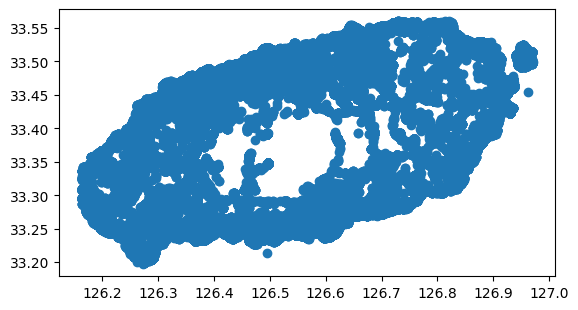

In [21]:
gdf.plot()

In [25]:
df_2021.columns

Index(['oid', 'longitude', 'latitude', 'Diff', 'geometry', 'Month', 'day',
       'hour', 'time_of_day'],
      dtype='object')

In [27]:
df['time'] = pd.to_datetime(df['time'])
df['Month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['hour'] = df['time'].dt.hour

df.to_csv('./체류거점/체류거점_2020.csv')

/home/dabs/.conda/envs/InHeon/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/dabs/.conda/envs/InHeon/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/dabs/.conda/envs/InHeon/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [29]:
bins = [0, 12, 18, 24] # 구간 경계 설정
labels = [0, 1, 2] # 0: "Morning", 1: "Afternoon", 2: "Evening"

df['time_of_day'] = pd.cut(df['hour'], bins=bins, labels=labels, right=False)
df['time_of_day'].value_counts()

/home/dabs/.conda/envs/InHeon/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


1    164596
0     82073
2     71514
Name: time_of_day, dtype: int64

In [33]:
df.drop(['collection_dt', 'time'], axis=1, inplace=True)
df.head()

/home/dabs/.conda/envs/InHeon/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,oid,longitude,latitude,Diff,geometry,Month,day,hour,time_of_day
0,0c0000fd,126.470092,33.482483,3768,POINT (126.47009 33.48248),2,1,7,0
1,0c0000fd,126.527728,33.500267,2461,POINT (126.52773 33.50027),2,1,22,2
2,0c0000fd,126.573477,33.256884,8238,POINT (126.57348 33.25688),2,1,23,2
3,46100018,126.546978,33.511985,2708,POINT (126.54698 33.51199),2,15,12,1
4,46100018,126.379015,33.475388,3429,POINT (126.37901 33.47539),2,15,13,1


In [38]:
df.to_csv('./체류거점/체류거점_2020.csv', index=False)